<a href="https://colab.research.google.com/github/Kiliangil88/4GeeksAcademy/blob/master/Kiliangil_Regresi%C3%B3nLineal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler

# encoding
from sklearn.preprocessing import OneHotEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archivo = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'

In [ ]:
#Conocimiento del dataset
df = pd.read_csv(archivo)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Conocimiento del dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

1


In [ ]:
duplicados = df[df.duplicated()]
print(duplicados)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
#Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


### Selección de atributos relevantes
De momento parece que no haga falta eliminar ninguna variable.

In [ ]:
#Valores faltantes
df.isnull().sum().sort_values(ascending=False)

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Análisis univariante

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Análisis variables categóricas

In [ ]:
df.sex.value_counts()


,count
sex,
male,676
female,662


In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


/tmp/ipython-input-2846964901.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


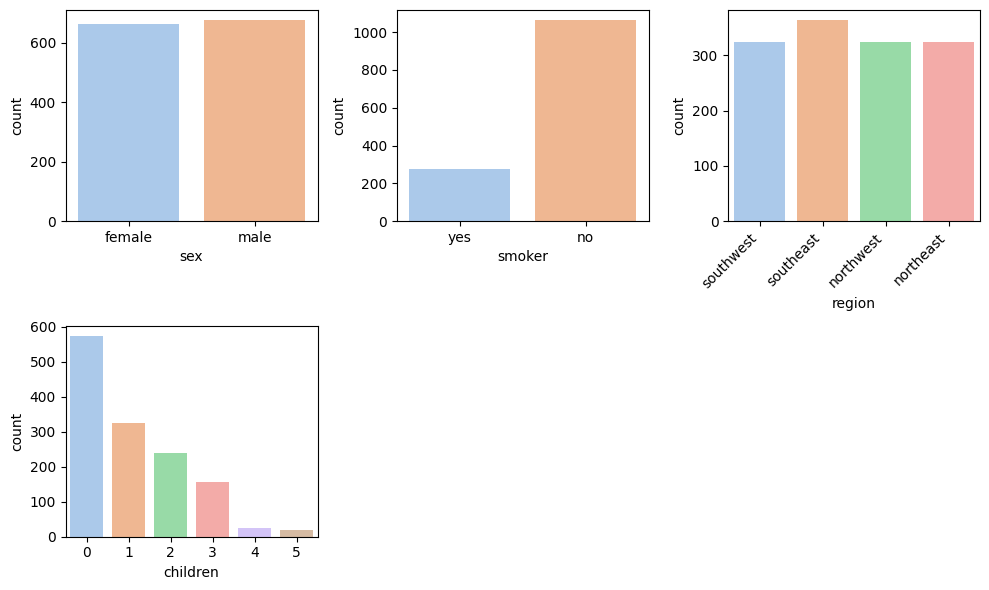

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "region", palette='pastel', hue= "region", legend=False)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[1, 0], data = df, x = "children", palette='pastel', hue= "children", legend=False)

fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

Con la representación de estas variables podemos deducir que:
- Sex: hay prácticamente el mismo úmero de hombres y de mujeres.
- Smoker: hay tres veces más gente no fumadora que fumadora.
- Region: los asegurados se distribuyen prácticamente igual en las distintas regiones.
- Children: La mayoría de los asegurados no tienen hijos y, de los que sí tienen, la mayoría solo 1.

#### Análisis variables numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


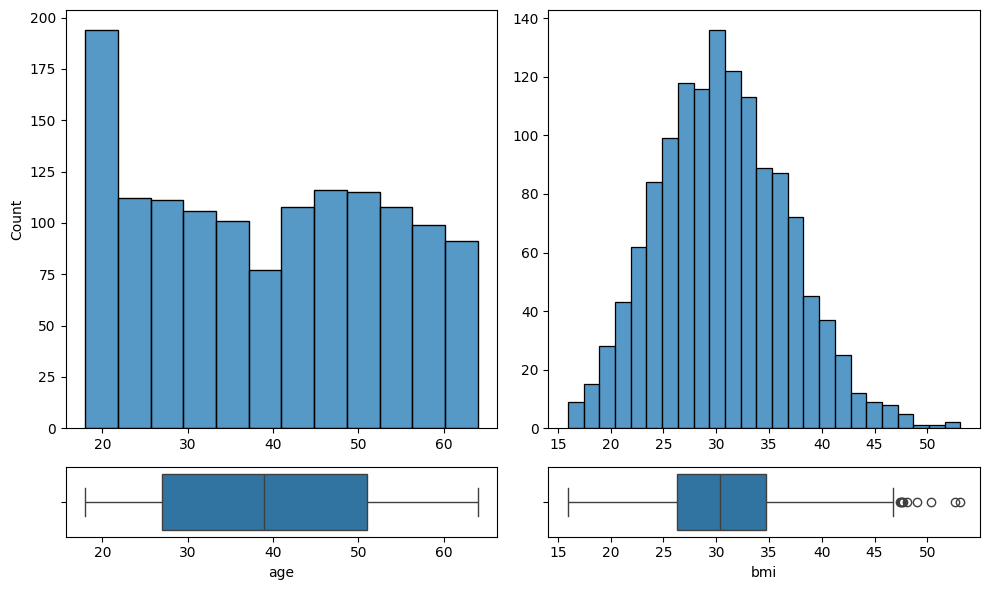

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})


sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")


plt.tight_layout()
plt.show()

De la combinación de estos gráficos podemos ver la distribución y sus características estadísticas.
#### Sex
- El histograma muestra una distribución bastante uniforme con un pico notable en las edades más jóvenes (alrededor de los 18–20 años).

- Esto indica que hay muchos asegurados jóvenes y después la cantidad de individuos es relativamente estable entre 20 y 60 años, con quizás una ligera disminución en edades más avanzadas.

- El boxplot confirma que no existen valores extremos (outliers) y que la edad media ronda los 40 años.

#### BMI
- El histograma muestra una forma aproximadamente normal, centrada cerca de los 30.

- Esto sugiere que la mayoría de personas tienen un IMC en torno a la frontera entre “normal” y “sobrepeso” según los criterios médicos.

- El boxplot muestra algunos outliers hacia los valores más altos (≥45–50), indicando la presencia de algunos casos con obesidad muy alta.

- No hay outliers hacia abajo, por lo que prácticamente no hay individuos con bajo peso extremo


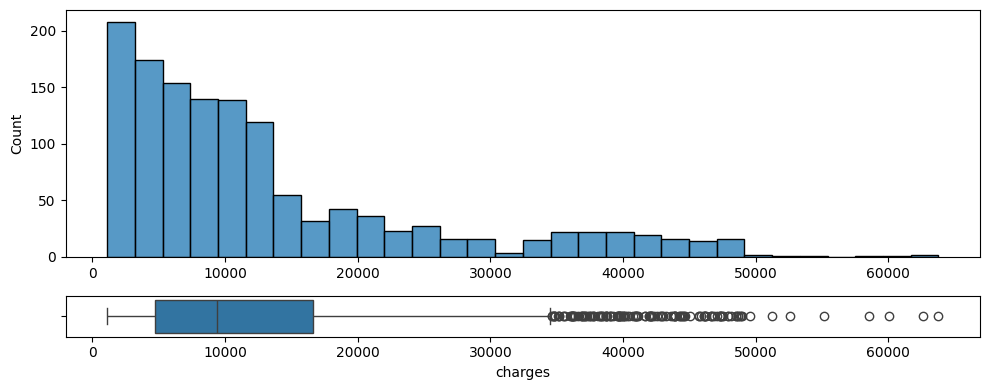

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 4), gridspec_kw={'height_ratios': [6, 1]})


sns.histplot(ax = axis[0], data = df, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "charges")

plt.tight_layout()
plt.show()

La distribución de los cargos médicos muestra una clara asimetría positiva (sesgo a la derecha). La mayoría de los individuos presentan gastos médicos bajos, concentrados por debajo de los 15000 dolares, mientras que un grupo reducido incurre en cargos muy elevados que alcanzan valores superiores a los 60000 dolares.

El boxplot confirma esta tendencia: la mediana se sitúa en torno a los 10000 $, con una gran cantidad de outliers hacia la derecha. Estos outliers representan a personas con costes médicos excepcionalmente altos, posiblemente asociados a tratamientos complejos, enfermedades crónicas o factores de riesgo adicionales.

En conjunto, los datos reflejan una distribución desigual de los gastos, donde unos pocos casos generan un impacto económico significativamente mayor sobre el total.

### Análisis multivariante

#### Análisis numérico-numérico

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


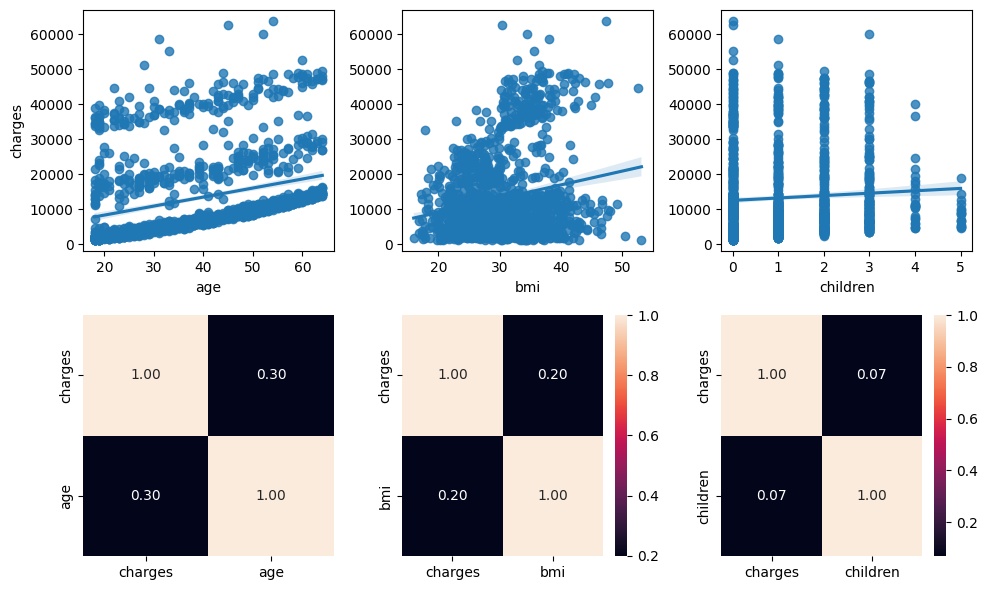

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])


plt.tight_layout()
plt.show()

Las variables más relacionadas con el coste (charges) son la edad y, en menor medida, el bmi. En referencia a la edad podemos decir que hay cierta tendencia positiva, es decir parece que a mayor edad también se roduce mayor gasto, aunque la relación no es perfecta por lo que hay otros factores que influyen.

El número de hijos tiene poca o ninguna relación con los gastos.

Estos gráficos sirven para realizar un análisis exploratorio inicial e identificar qué variables podrían tener más peso en un modelo de regresión para predecir charges.

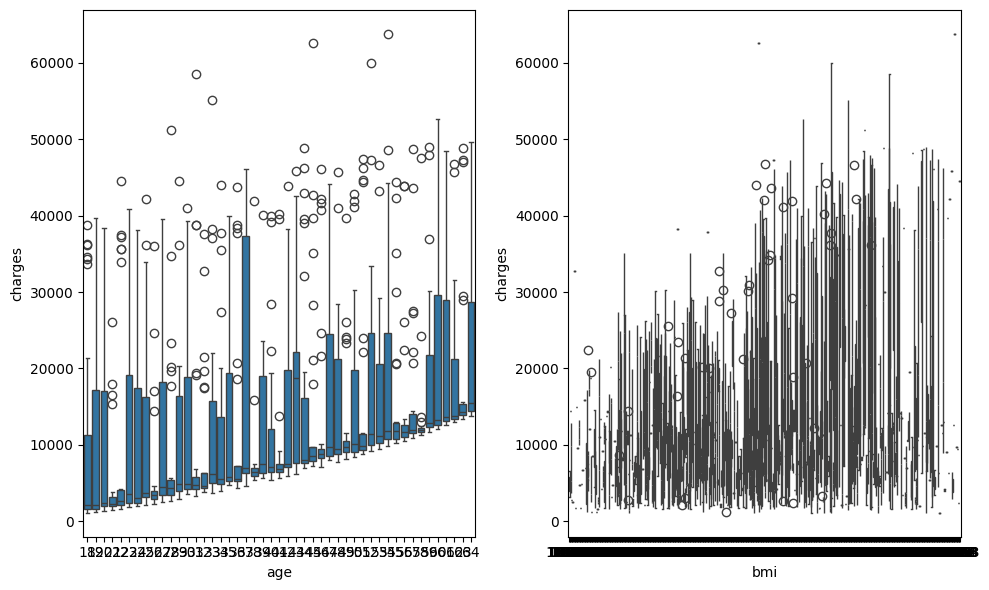

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (10, 6))

sns.boxplot(ax= axis[0], x='age', y='charges', data=df)
sns.boxplot(ax= axis[1], x='bmi', y='charges', data=df)

plt.tight_layout()
plt.show()

#### Análisis categórico-categórico

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


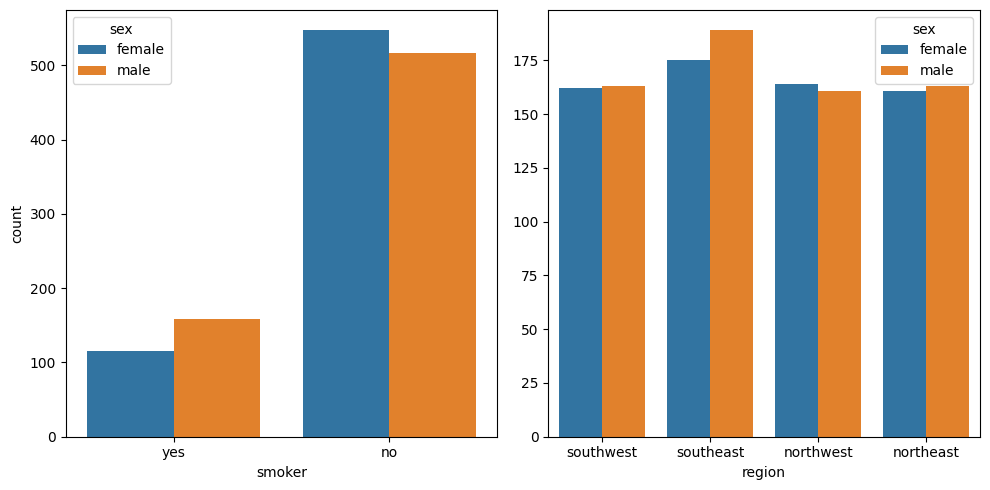

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(ax = axis[0], data = df, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1], data = df, x = "region", hue = "sex").set(ylabel = None)


plt.tight_layout()


plt.show()

No creo que el análisis categórico-categórico tenga mucha utilidad en referencia a lo que vamos a predecir si dejamos los valores como categóricos.

#### Análisis de correlaciones

In [ ]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


#### Análisis numérico categórico

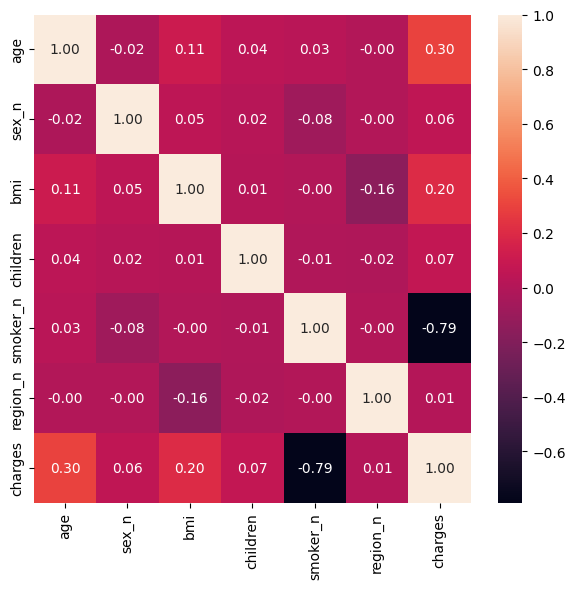

In [ ]:
fig, axis = plt.subplots(figsize = (6, 6))

sns.heatmap(df[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis muestra que las variables con mayor influencia en el coste del seguro son: Smoker, Age, y BMI.

Correlación muy fuerte negativa: significa que los fumadores tienen gastos mucho más altos que los no fumadores.

Las demás (número de hijos, sexo, región) tienen un papel casi despreciable.

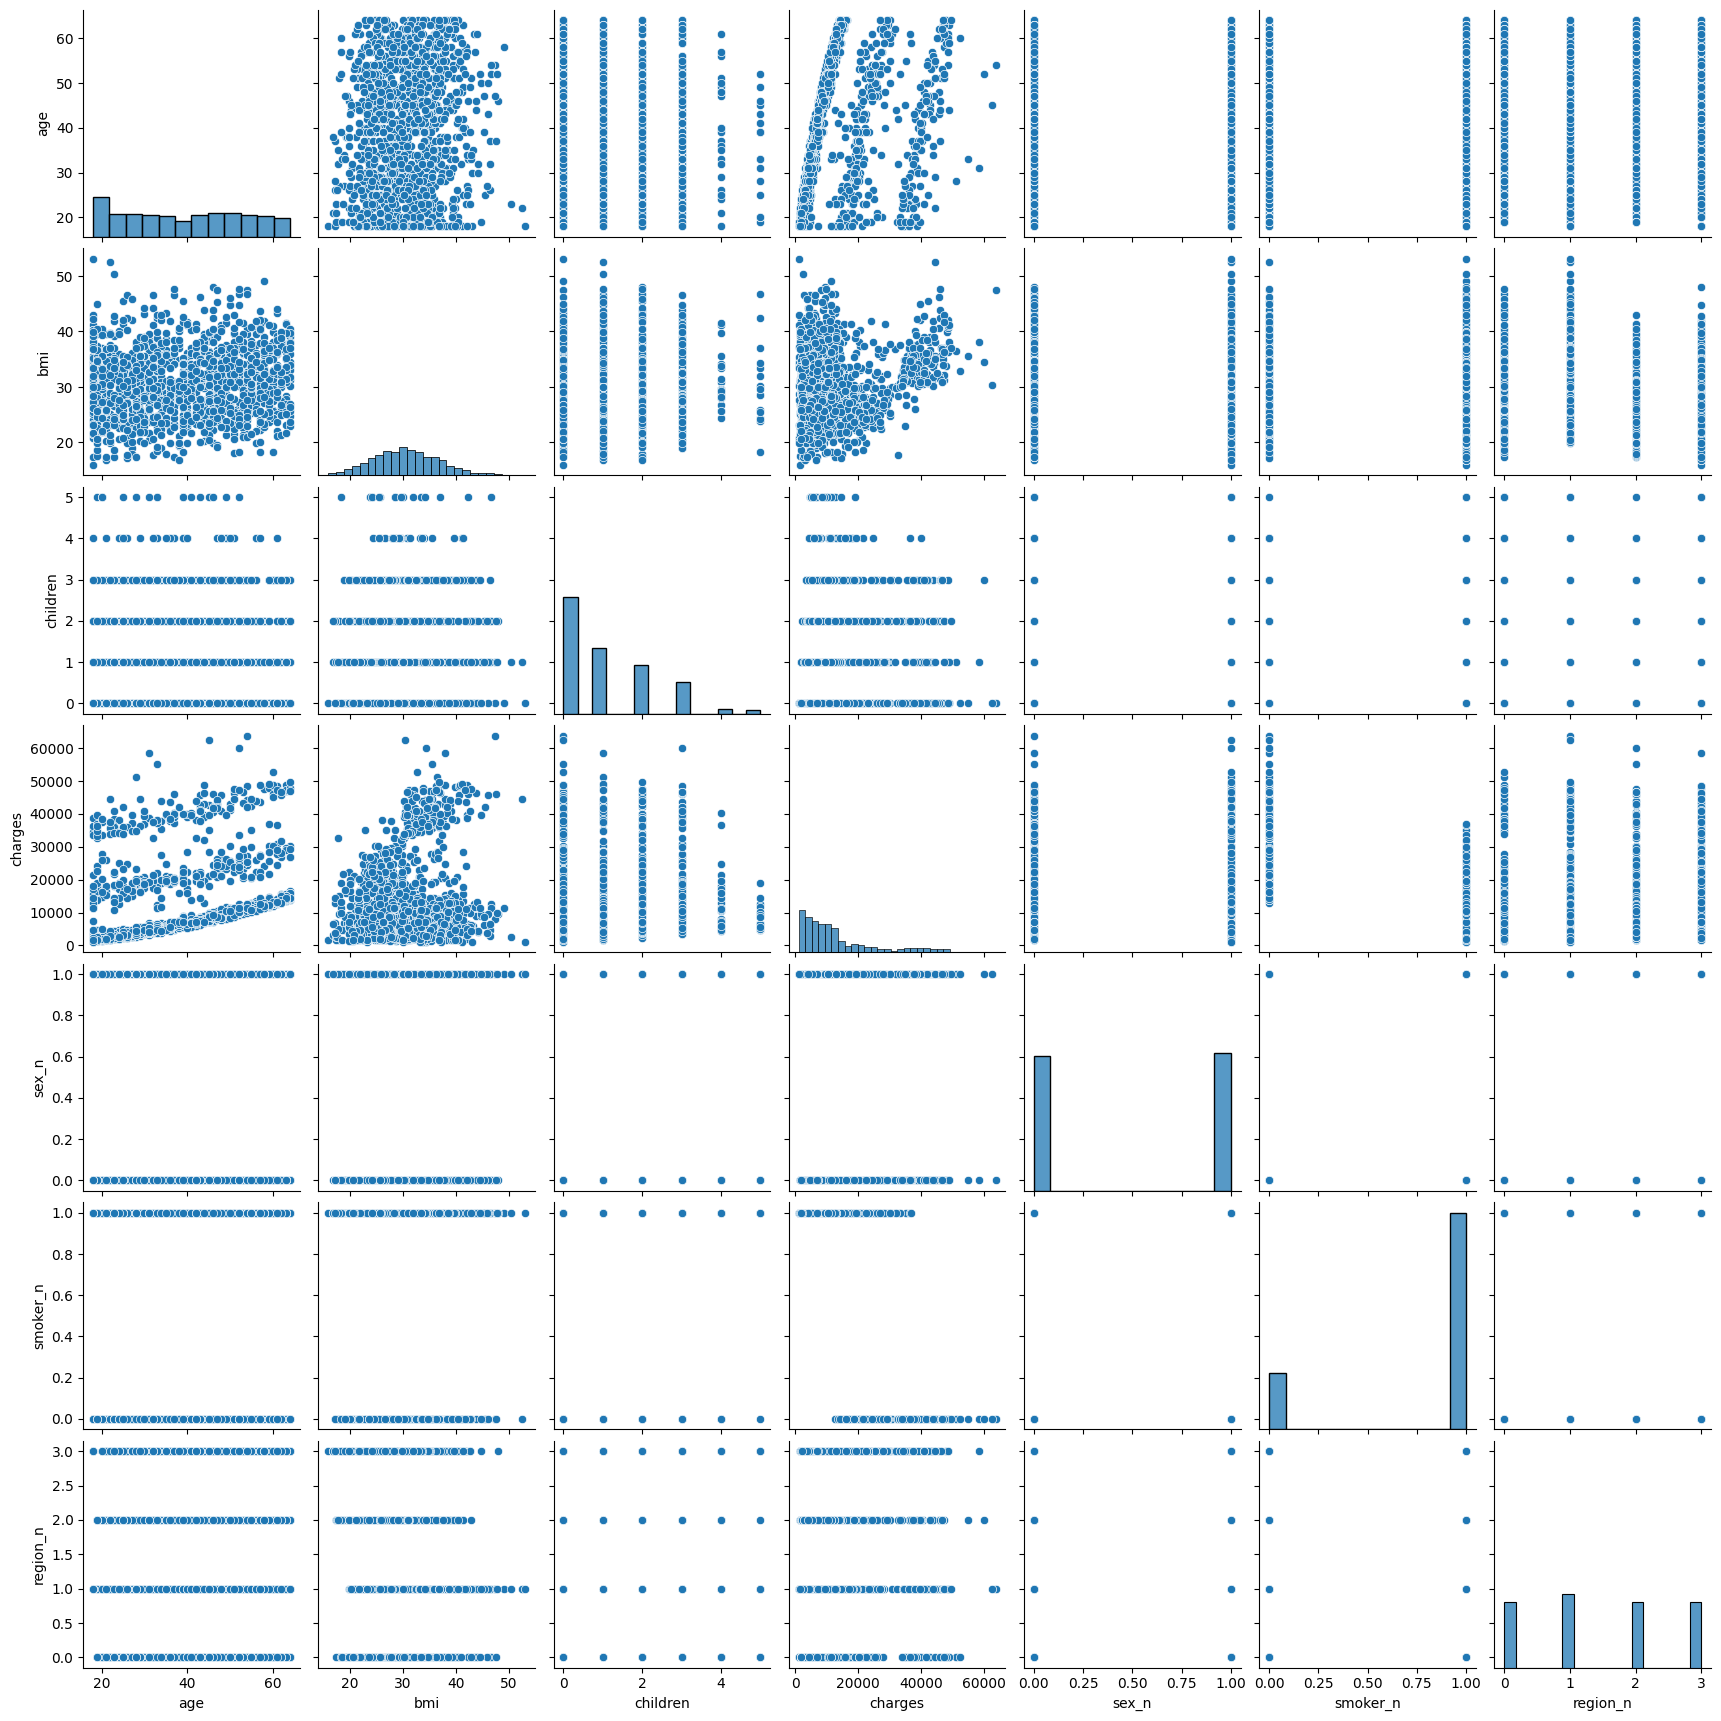

In [ ]:
sns.pairplot(data = df)

### Ingeniería de atributos

In [ ]:
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

X_train.head()

,age,sex,bmi,children,smoker,region,sex_n,smoker_n,region_n
1256,51,female,36.385,3,no,northwest,0,1,2
147,51,female,37.730,1,no,southeast,0,1,1
1042,20,male,30.685,0,yes,northeast,1,0,3
889,57,male,33.630,1,no,northwest,1,1,2
650,49,female,42.680,2,no,southeast,0,1,1


#### Escalado

In [ ]:
num_variables = ["age", "bmi", "children"]

In [ ]:
# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# Aplicar el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,age,bmi,children
1256,0.814371,0.923617,1.595764
147,0.814371,1.142851,-0.065197
1042,-1.385181,-0.005479,-0.895677
889,1.240091,0.474554,-0.065197
650,0.672465,1.949698,0.765283


#### Codificación

In [ ]:
cat_variables= ["sex", "smoker", "region"]

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') #uso el drop, para evitar multicolinealidad y evito columnas redundantes

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_variables])

# aplico el encoder en amhos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head(10)

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1256,0.0,0.0,1.0,0.0,0.0
147,0.0,0.0,0.0,1.0,0.0
1042,1.0,1.0,0.0,0.0,0.0
889,1.0,0.0,1.0,0.0,0.0
650,0.0,0.0,0.0,1.0,0.0
288,0.0,1.0,0.0,0.0,0.0
388,0.0,0.0,1.0,0.0,0.0
397,1.0,0.0,0.0,1.0,0.0
607,0.0,1.0,1.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_ohe], axis=1)

X_train_final.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1256,0.814371,0.923617,1.595764,0.0,0.0,1.0,0.0,0.0
147,0.814371,1.142851,-0.065197,0.0,0.0,0.0,1.0,0.0
1042,-1.385181,-0.005479,-0.895677,1.0,1.0,0.0,0.0,0.0
889,1.240091,0.474554,-0.065197,1.0,0.0,1.0,0.0,0.0
650,0.672465,1.949698,0.765283,0.0,0.0,0.0,1.0,0.0


#### Selección de características

In [ ]:
#Con un valor de k = 6 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(score_func = f_regression, k = 6)

# entreno la seleecion
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

,age,bmi,children,sex_male,smoker_yes,region_southeast
0,0.814371,0.923617,1.595764,0.0,0.0,0.0
1,0.814371,1.142851,-0.065197,0.0,0.0,1.0
2,-1.385181,-0.005479,-0.895677,1.0,1.0,0.0
3,1.240091,0.474554,-0.065197,1.0,0.0,0.0
4,0.672465,1.949698,0.765283,0.0,0.0,1.0


Después de probar el modelo, descarto el conjunto seleccionado(X_train_sel) y me quedo con X_train_final.

### Modelo regresión lineal

In [ ]:
# instanciamos el modelo con valores por defecto
model = LinearRegression()
# entrenamos
model.fit(X_train_final, y_train)

LinearRegression()

In [ ]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (b0): 9180.514147101836
Coeficientes (b1, b2): [ 3692.05530173  2082.90357967   731.15551483    42.53287761
 23878.98460102  -394.58900829 -1073.70858238  -974.17693684]


In [ ]:
#Predicción del modelo
y_pred = model.predict(X_test_final)
y_pred

array([33890.21746398, 25233.16770791,  3791.35859501,  3236.48950223,
        2753.78589644,  8033.19434312,   986.8359004 , 34996.35894003,
        8442.93273586,  8820.10937347,  3895.51369222,  6211.06335152,
       35977.64400112, 32768.35404822,  5519.16539467, 37357.53637207,
       27197.40132169,  9381.17555737, 30153.99797749,  8237.76932057,
        5443.36483562,  9757.7881789 ,  3380.6687726 , 18562.02604072,
       11847.3988793 ,  8691.27557737,  7683.21386456, 39069.50138105,
        3714.68510187,   -48.3377788 ,  6882.26406994,  9270.97591921,
        5484.24601192, 41119.11931005,  6971.11105692,  5577.71534461,
        5458.22851457,  3827.22533323,  6328.95680314, 11561.51731191,
        7167.25740263, 10780.62087794, 15750.70435474,  2725.46683683,
       11149.61900748, 11239.45478649, 11669.62825239,  6451.20447244,
        9674.10638387, 28654.83352765,  1286.48507399,  2157.91909444,
        9004.72207652, 10266.46054073, 12935.60069719, 26766.68773927,
      

In [ ]:
#Evaluación del modelo
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

#Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Error cuadrático medio: 29852191.005790923
RMSE: 5463.715860638337
Coeficiente de determinación: 0.7710274150588438


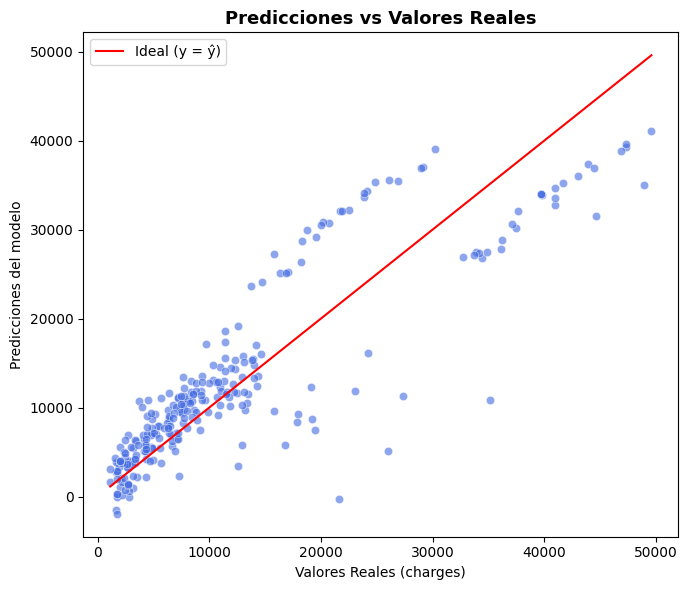

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal (y = ŷ)')
plt.title('Predicciones vs Valores Reales', fontsize=13, fontweight='bold')
plt.xlabel('Valores Reales (charges)')
plt.ylabel('Predicciones del modelo')
plt.legend()
plt.tight_layout()
plt.show()

#### Regularización

In [ ]:
#Lasso
reg_lasso = Lasso(alpha = 0.8, max_iter = 8000)

# entrenamiento
reg_lasso.fit(X_train_final, y_train)

# prediccion
y_pred = reg_lasso.predict(X_test_final)
y_pred

# metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  29852674.342713874
RMSE:  5463.7600919800525
Coeficiente de determinación:  0.7710237077629664


In [ ]:
#Ridge
reg_ridge = Ridge(alpha = 0.8, max_iter = 8000)

# entrenamiento
reg_ridge.fit(X_train_final, y_train)

# prediccion
y_pred = reg_ridge.predict(X_test_final)
y_pred

# metricas
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  29852191.005790923
RMSE:  5463.715860638337
Coeficiente de determinación:  0.7710274150588438


#### Resultados

In [ ]:
data = {
    'Modelo': ['Regresión lineal', "Regulación Lasso", "Regulación Ridge"],
    'MSE': [mse, mse_l1, mse_l2],
    'RMSE': [rmse, rmse_l1, rmse_l2],
    'R²': [r2, r2_l1, r2_l2]
}

# Crear el DataFrame
resultados = pd.DataFrame(data)

# Mostrar el DataFrame
print(resultados)

             Modelo           MSE         RMSE        R²
0  Regresión lineal  2.985219e+07  5463.715861  0.771027
1  Regulación Lasso  2.985267e+07  5463.760092  0.771024
2  Regulación Ridge  2.985219e+07  5463.715861  0.771027


Como podemos ver en este caso la regularizaciones Lasso y Ridge no comportan cambios importantes en las métricas del modelo.

### Conclusión
Finalmente, en nuestro modelo de regresión lineal:

Si la variable está medida en $ un RMSE de 5463.71 dice que en promedio se equivoca en ese valor.

Si nos apoyamos en el valor del  𝑅2 , observamos que es de un 77%, un valor moderadamente alto, luego el 77% de los datos están explicados por el modelo, por lo que lo consideraría notablemente satisfactorio.